# K-Means Clustering and PCA
## Definition
The K-Means Clustering Approach is an unsupervised machine learning algorithm that attempts to partition unlabeled data into clusters or segments using data without predetermined categories or groups. K-Means is a model-training approach that splits data into multiple categories or groups. To put it another way, they group objects or data points that are similar.
## ALgorithm
A cluster is characterized by a centroid, which is located in the middle of the cluster, and the number of groups or clusters is denoted by K in the K-means cluster method. The number of needed clusters or segments is represented by variable K, which is a hyperparameter.![](https://editor.analyticsvidhya.com/uploads/56854k%20means%20clustering.png)
### How to find the Optimal Number of Clusters?
* The Elbow Method
One of the most prominent approaches for determining the ideal value of k is the Elbow Method. We utilize a statistic called the Within Cluster Sum Of Squares to determine the ideal number of clusters (WCSS). The WCSS mathematical formula is as follows:
$$ \text{WCSS(k)} = \sum_{j=1}^k\sum_{x_i\in cluster j}\Vert{x_i-\bar{x}_j\Vert}^2 $$
where $\bar{x}_j$ is the sample mean in cluster j. In terms of analyzing or comparing the goodness of fit between two different K-Means clusters, WCSS is a helpful statistic. As the number of clusters grows larger, the value of WCSS decreases.
<img src="https://www.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/995b8b58-06f1-4884-a2a1-f3648428e947.png" width="500" height="400" />

To find the ideal number of clusters, we must find the value of k at the "elbow," or the point at which the WCSS begins to decrease linearly. Using the above figure as an example, we could find that the best number of clusters for the given data is three.

## Steps
* Randomly choose K distinct feature vectors as your starting "centroids" $C_1, C_2,..., C_k$.

* Assign each feature vector to the closest centroid and let:
$$ A_i=\{x:x_i \text{ is assign to } C_i\}$$

* let $C_i \rightarrow \frac{1}{\vert A_i\vert}\sum_{x\in A_i} x$, (move to the average)

* Repeat 2, 3 until the centroids no longer move.

* Return $A_1, A_2, ....,A_k$

## Advantages
* It's a breeze to put into action. 
* It can handle a large data collection and responds quickly to massive datasets. 
* It frequently adjusts to new cases. 
* Cluster generalization for various shapes and sizes. 


## Drawbacks
* It is highly sensitive to outliers. 
* Manually selecting the k values is a difficult task. 
* Scalability reduces as the number of dimensions grows.

## Principal Component Analysis (PCA)
Principal Component Analysis (PCA) is an unsupervised, non-parametric statistical approach that is largely employed in machine learning for dimensionality reduction. 
The primary goal of PCA is to identify such principle components that may characterize the data points with a collection of principal components.

<img src="https://assets.website-files.com/5e6f9b297ef3941db2593ba1/5f76ef7799e20652be0d79f6_Screenshot%202020-10-02%20at%2011.12.32.png" width="400" height="200" />
 
The vectors that make up the primary components are not picked at random. The first principal component is calculated to explain the most variation in the original features. The second component is orthogonal to the first and explains the majority of the variation that remains after the first principal component.


## Data
The Wheat Seeds Dataset involves the prediction of species given measurements of seeds from different varieties of wheat.

It is a multiclass (3-class) classification problem. The number of observations for each class is balanced. There are 210 observations with 7 input variables and 1 output variable. The variable names are as follows:

* Area.
* Perimeter.
* Compactness
* Length of kernel.
* Width of kernel.
* Asymmetry coefficient.
* Length of kernel groove.
* Class (1, 2, 3).

## Package 
I will use the following packages in this project:
* [matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)
* [numpy](https://numpy.org)
* [pandas](https://pandas.pydata.org)
* [sklearn](https://scikit-learn.org/stable/)
* [ mpl_toolkits](https://matplotlib.org/2.2.2/mpl_toolkits/index.html)

## Implement with in class code 

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn import datasets
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
%matplotlib inline
plt.style.use('fivethirtyeight')

In [235]:
seeds = pd.read_csv('seeds.csv')
seeds.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [236]:
X = seeds.drop("Type", axis=1)
X.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [237]:
y = seeds["Type"]

In [238]:
X = X.to_numpy()
y = y.to_numpy()

### Before PCA : (using two features of data)

In [239]:
## Data Visualization before PCA

Text(0.5, 1.0, 'Visualization of raw data (using two features)')

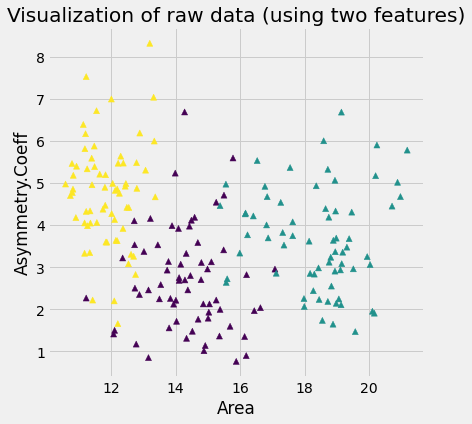

In [240]:
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 5], marker = "^", c=y)
plt.xlabel('Area')
plt.ylabel('Asymmetry.Coeff')
plt.title('Visualization of raw data (using two features)')

## After PCA
I will use [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) in sklearn.decomposition 
to keep only 2 components of the data.

In [241]:
X_PCA = PCA(n_components=2).fit_transform(X)
X_PCA.shape

(199, 2)

Text(0.5, 1.0, 'Data After PCA')

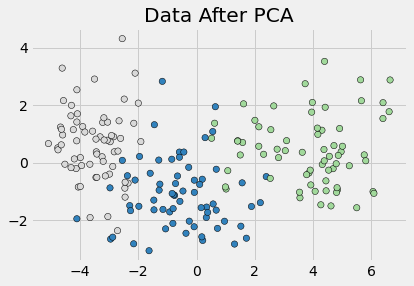

In [242]:
plt.scatter(
    X_PCA[:,0],
    X_PCA[:,1],
    c=y,
    cmap="tab20c",
    edgecolor='k',
    s=40,
)
plt.title("Data After PCA")

In [243]:
# randomly choose 2 initial centroids
k=2
C=[]
for _ in range(k):
  i=np.random.randint(len(X_PCA))
  C.append(X_PCA[i,:])

In [244]:
# Define function of distance
def distance(v,w):
  return np.sqrt((v-w) @ (v-w))

distance(C[0],X_PCA[0])

4.2883287754092825

In [245]:
def assignment(x,Centroids):
  distances = np.array([distance(x,centroid) for centroid in Centroids])
  return np.argmin(distances)
assignment(X_PCA[0],C)

0

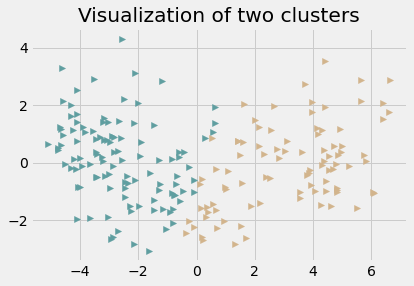

In [246]:
for x in X_PCA:
  if assignment(x,C) == 0:
    plt.scatter(x[0],x[1],color = 'tan', marker = ">")
  else:
    plt.scatter(x[0],x[1],color = 'cadetblue',  marker = ">")
    plt.title('Visualization of two clusters')

In [247]:
def make_classes(data,Centroids):
  A = dict()
  for i in range(len(Centroids)):
    A[i] = []

  for x in data:
     A[assignment(x,Centroids)].append(x)
  return A

In [248]:
A = make_classes(X_PCA,C)
A[1][1]

array([-1.15003604, -1.62238169])

In [249]:
# acquire new Centroids by averaging the distance
def new_Centroids(data,Centroids):
  new_Centroids =[]
  A = make_classes(data,Centroids)
  for i in range(len(Centroids)):
    new_Centroids.append((1/len(A[i]))*sum(A[i]))

  return new_Centroids 

In [250]:
new_C = new_Centroids(X_PCA,C)  

In [251]:
new_C

[array([ 3.10906381, -0.12830762]), array([-2.56711691,  0.10594207])]

In [252]:
C

[array([ 4.83078763, -0.94586064]), array([-4.08595028,  1.70316545])]

Try k = 3 and iteration = 3

In [253]:
def initialize_centroids(data,k):
  Centroids =[]
  for _ in range(k):
    i = np.random.randint(len(X_PCA))
    Centroids.append(X_PCA[i,:])
  return Centroids


k=3
C0 = initialize_centroids(X_PCA,k=k)
C1 = new_centroids(X_PCA,C0)
C2 = new_centroids(X_PCA,C1)
C3 = new_centroids(X_PCA,C2)

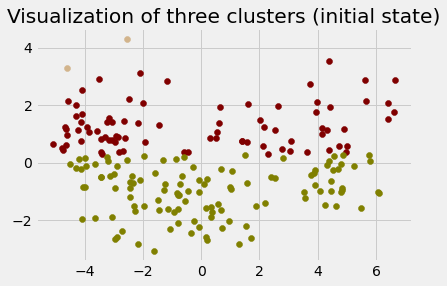

In [254]:
for x in X_PCA:
  if assignment(x,C0) == 0:
    plt.scatter(x[0],x[1],color='olive')
  elif assignment(x,C0) == 1:
    plt.scatter(x[0],x[1],color='tan')
  else:
    plt.scatter(x[0],x[1],color='maroon')
    plt.title('Visualization of three clusters (initial state)')

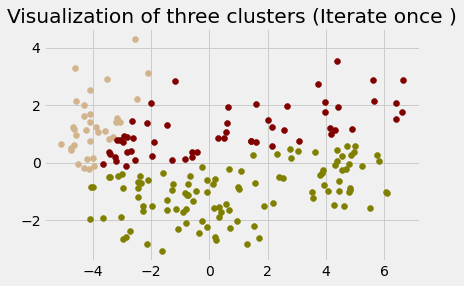

In [255]:
for x in X_PCA:
  if assignment(x,C1) == 0:
    plt.scatter(x[0],x[1],color='olive')
  elif assignment(x,C1) == 1:
    plt.scatter(x[0],x[1],color='tan')
  else:
    plt.scatter(x[0],x[1],color='maroon')
    plt.title('Visualization of three clusters (Iterate once )')

Then, we will set max_iterations = 100. When centroid distance is equal to or less than 0.01, the iteration will be stopped. 

In [256]:
def fit(data, k, max_iterations=100, epsilon=0.01):
  C_old = initialize_centroids(data, k = k)
  C_new = new_centroids(data,C_old)
  centroid_distances = [distance(p[0],p[1]) for p in zip (C_old,C_new)]
  iterations = 0
  while max(centroid_distances) > epsilon  and iterations < max_iterations:
    C_old, C_new = C_new, new_centroids(data,C_new)
    centroid_distances = [distance(p[0],p[1]) for p in zip (C_old,C_new)]
    iterations += 1
  return C_new

In [257]:
# Function to calculate mean square error between every points and their cluster centroids
def mse_classes(data,Centroids):
  errors = []
  A_classes = make_classes(data,Centroids)
  for i, centroid in enumerate(Centroids):

    error = sum(0.5*(centroid-a)@(centroid-a) for a in A_classes[i])
    errors.append(error)
  return sum(x for x in errors)

## Elbow Method
Based on the sum of squared distance (SSE) between data points and their assigned clusters' centroids, the elbow technique offers us an indication of what a suitable k number of clusters might be. At the point when SSE begins to flatten out and form an elbow, we choose k. Using the geyser dataset, we'll calculate MSE for various k values to determine where the curve could form an elbow and flatten out. 

In [258]:
k=4
C0 = initialize_centroids(X_PCA,k=k)
C1 = new_centroids(X_PCA,C0)
C2 = new_centroids(X_PCA,C1)
C3 = new_centroids(X_PCA,C2)
C4 = new_centroids(X_PCA,C3)
C = [C1,C2, C3, C4]
errors = [mse_classes(X_PCA, centroids) for centroids in C]
errors

[215.23007224146076, 211.68815597400769, 211.35540788717873, 211.2978859760044]

In [260]:
C1 = fit(X_PCA,k=1)
C2 = fit(X_PCA,k=2)
C3 = fit(X_PCA,k=3)
C4 = fit(X_PCA,k=4)
C5 = fit(X_PCA,k=5)
C6 = fit(X_PCA,k=6)
C7 = fit(X_PCA,k=7)

C = [C2,C3,C4,C5,C6,C7]

Text(0.5, 1.0, 'mse for each value of k using Elbow method')

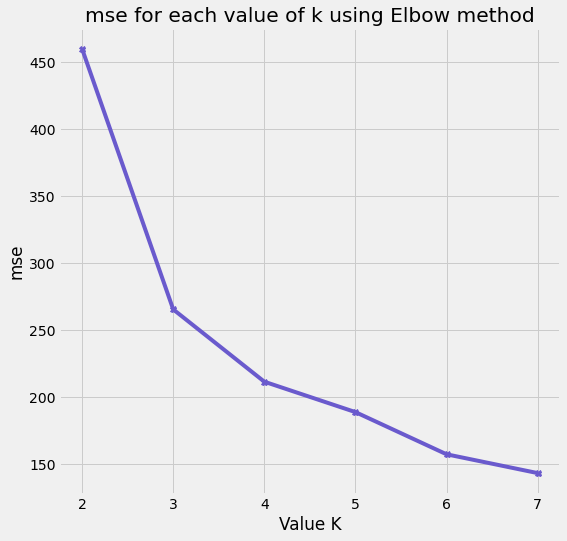

In [225]:
errors = [mse_classes(X_PCA,centroids) for centroids in C]
plt.figure(figsize=(8,8))
plt.plot([i for i in range(2,8)],errors, marker = "X", color="slateblue")
plt.xlabel("Value K")
plt.ylabel("mse")
plt.title("mse for each value of k using Elbow method")

It seems that the value k = 4 might be a good choice. 

In [227]:
k=4
C_old = initialize_centroids(X_PCA, k = k)
C_new = new_centroids(X_PCA, C0)
[distance(p[0], p[1]) for p in zip(C_old, C_new)]

[4.3838725458249606, 7.932817851028754, 6.381007038315379, 2.060498048043493]

### Visialization of clusters

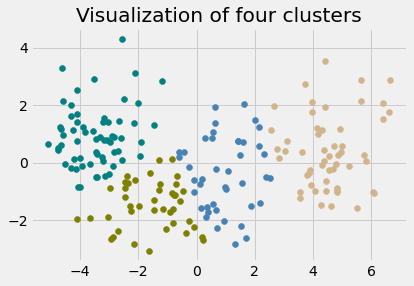

In [261]:
## four clusters
[p for p in zip(C_old, C_new)]
for x in X_PCA:
    if assignment(x, C4) == 0:
        plt.scatter(x[0], x[1], color = "olive")
        plt.title('Visualization of four clusters')
    elif assignment(x, C4) == 1:
        plt.scatter(x[0], x[1], color = "tan")
    elif assignment(x, C4) == 2:
        plt.scatter(x[0], x[1], color = "teal")
    else:
        plt.scatter(x[0], x[1], color = "steelblue")

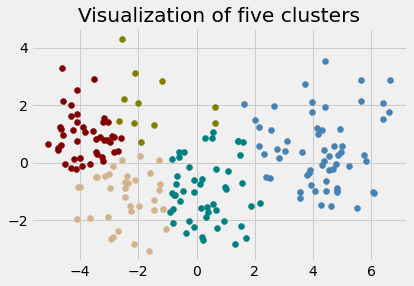

In [262]:
## five clusters
[p for p in zip(C_old, C_new)]
for x in X_PCA:
    if assignment(x, C5) == 0:
        plt.scatter(x[0], x[1], color = "olive")
        plt.title('Visualization of five clusters')
    elif assignment(x, C5) == 1:
        plt.scatter(x[0], x[1], color = "tan")
    elif assignment(x, C5) == 2:
        plt.scatter(x[0], x[1], color = "teal")
    elif assignment(x, C5) == 3:
        plt.scatter(x[0], x[1], color = "maroon")
    else:
        plt.scatter(x[0], x[1], color = "steelblue")

### Silhouette analysis
The silhouette method is somewhat different. Silhouette analysis can be used to determine the degree of separation between clusters. 
* Calculate the average distance from all data points in the same cluster ($a^i$).
* Calculate the average distance from all data points in the closest cluster ($b^i$).
* Calculate the coefficient:
$$\frac{b^i-a^i}{max(a^i,b^i)}$$

Note : The $a^i$ value must be less than the $b^i$ value, that is $a^i$ << $b^i$.

The coefficient can take values in the interval \[-1, 1\].

* If it is 0 –> the sample is very close to the neighboring clusters.
* It it is 1 –> the sample is far away from the neighboring clusters.
* It it is -1 –> the sample is assigned to the wrong clusters.

Thus, we prefer the coefficients to be as large as possible and close to 1 to have a optimal clusters. 

I will use [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), [silhouette_samples](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html), and [silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) to do Silhouette analysis

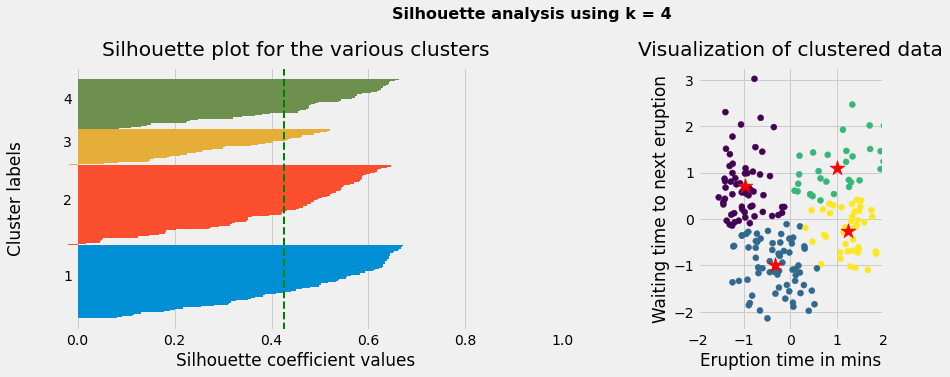

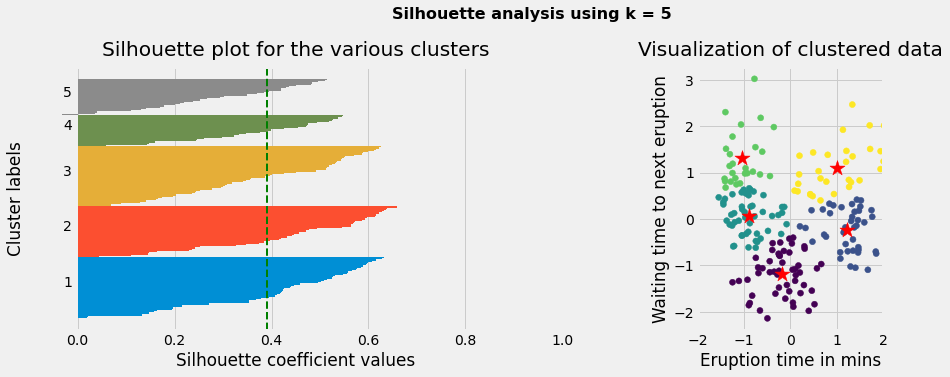

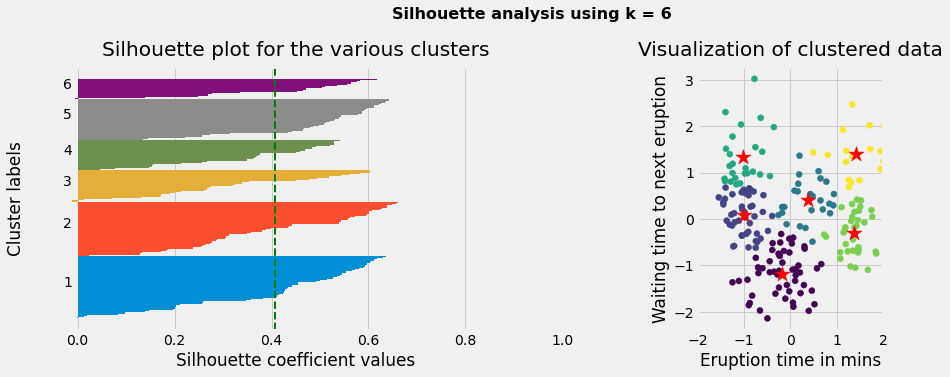

In [275]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
X_std = StandardScaler().fit_transform(X_PCA)
for i, k in enumerate([4,5,6]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_std)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_std, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

Generally, for a reasonable k value, silhouette average score should be larger than 0.5, and silhouette score of all the clusters should be higher than the average score. The thickness of the silhouette plot gives an indication of how big each cluster is. When k=4, the average silhouette score is the highest, and the silhouette scores of all clusters are above the average, meaning that k = 4 is probably a good choice. However, when we change k = 5 and 6, the average silhouette score slightly decreased. But the difference of silhouette average score among the three k values is not significantly large.

## Reference

Dabbura, I. (2020, August 10). K-means Clustering: Algorithm, Applications, Evaluation Methods, And Drawbacks | By Imad Dabbura | Towards Data Science. Medium. https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a.

J. Garbade, D. M. (2018, September 12). Understanding K-means Clustering In Machine Learning | By Dr. Michael J. Garbade | Towards Data Science. Medium. https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1.

A Guide To Principal Component Analysis (PCA) for Machine Learning. (n.d.). A Guide to Principal Component Analysis (PCA) for Machine Learning. https://www.keboola.com/blog/pca-machine-learning.